In [1]:
## read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
assignment_df = pd.read_excel(r"C:\Users\Admin\Downloads\Analyst case study dataset 1.xlsx")
assignment_df= assignment_df.dropna(how='all')

In [2]:
assignment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LeadCreated                  3021 non-null   datetime64[ns]
 1   FirstName                    3021 non-null   object        
 2   Email                        3021 non-null   object        
 3   VendorLeadID                 3013 non-null   object        
 4   CallStatus                   881 non-null    object        
 5   WidgetName                   3021 non-null   object        
 6   PublisherZoneName            3021 non-null   object        
 7   PublisherCampaignName        3021 non-null   object        
 8   AddressScore                 1171 non-null   float64       
 9   PhoneScore                   1393 non-null   float64       
 10  AdvertiserCampaignName       3021 non-null   object        
 11  State                        3021 non-null 

In [3]:
assignment_df.head()

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,2009-07-01 01:24:29.563,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,2009-04-13 15:27:35.990,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,2009-04-21 07:22:59.000,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,2009-08-03 19:39:02.000,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,2009-04-13 10:18:37.490,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


In [4]:
# Step 1: Initial Exploratory Data Analysis (Before Cleaning)
print("Initial Missing Values:\n")
print(assignment_df.isnull().sum())

Initial Missing Values:

LeadCreated                       0
FirstName                         0
Email                             0
VendorLeadID                      8
CallStatus                     2140
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                   1850
PhoneScore                     1628
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
IP Address                     3021
Partner                           0
ReferralDomain                  515
MarketingCampaign               272
AdGroup                         272
Keyword                        2042
SearchQuery                    1756
ReferralURL                     515
ReferralURL Parameters          738
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64


### Data Cleaning

In [5]:
# Drop irrelevant or null columns
assignment_df_cleaned = assignment_df.drop(columns=['IP Address', 'First name', 'Email'], errors='ignore')

In [6]:
# Convert 'LeadCreated' to datetime format
assignment_df_cleaned['LeadCreated'] = pd.to_datetime(assignment_df_cleaned['LeadCreated'])

In [7]:
# Fill missing values for categorical columns with "Unknown"
categorical_columns = ['CallStatus', 'ReferralDomain', 'MarketingCampaign', 'AdGroup', 
                       'Keyword', 'SearchQuery', 'ReferralURL', 'ReferralURL Parameters']
assignment_df_cleaned[categorical_columns] = assignment_df_cleaned[categorical_columns].fillna('Unknown')

In [8]:
# Keep NaN for AddressScore and PhoneScore to preserve data integrity
numeric_columns = ['AddressScore', 'PhoneScore']
for col in numeric_columns:
    assignment_df_cleaned[col] = assignment_df_cleaned[col]  # Keeping NaN as is

In [9]:
# Conditional Imputation (Only for Recent Leads)
recent_threshold = assignment_df_cleaned['LeadCreated'].quantile(0.75)  # Adjust as needed
recent_data = assignment_df_cleaned[assignment_df_cleaned['LeadCreated'] >= recent_threshold]

In [10]:
# Compute median AddressScore and PhoneScore per CallStatus group for recent leads
address_medians = recent_data.groupby('CallStatus')['AddressScore'].median()
phone_medians = recent_data.groupby('CallStatus')['PhoneScore'].median()

In [11]:
# Impute only for recent data using CallStatus-based median
assignment_df_cleaned.loc[assignment_df_cleaned['LeadCreated'] >= recent_threshold, 'AddressScore'] = \
    assignment_df_cleaned['AddressScore'].fillna(assignment_df_cleaned['CallStatus'].map(address_medians))

assignment_df_cleaned.loc[assignment_df_cleaned['LeadCreated'] >= recent_threshold, 'PhoneScore'] = \
    assignment_df_cleaned['PhoneScore'].fillna(assignment_df_cleaned['CallStatus'].map(phone_medians))

In [12]:
# Checking the percentage of missing values in AddressScore and PhoneScore
missing_values = assignment_df_cleaned[['AddressScore', 'PhoneScore']].isnull().mean() * 100

# Display the percentage of missing values
missing_values

AddressScore    61.006289
PhoneScore      53.657729
dtype: float64

In [13]:
print("\nMissing Values After Cleaning:\n")
print(assignment_df_cleaned.isnull().sum())


Missing Values After Cleaning:

LeadCreated                       0
FirstName                         0
VendorLeadID                      8
CallStatus                        0
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                   1843
PhoneScore                     1621
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
Partner                           0
ReferralDomain                    0
MarketingCampaign                 0
AdGroup                           0
Keyword                           0
SearchQuery                       0
ReferralURL                       0
ReferralURL Parameters            0
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64


### Feature Engineering

In [14]:
# Create Missing Flags for AddressScore and PhoneScore
assignment_df_cleaned['AddressScore_Missing'] = assignment_df_cleaned['AddressScore'].isna().astype(int)
assignment_df_cleaned['PhoneScore_Missing'] = assignment_df_cleaned['PhoneScore'].isna().astype(int)

In [15]:
# Split WidgetName using '-' and expand into multiple columns
widget_parts = assignment_df_cleaned['WidgetName'].astype(str).str.split('-', expand=True)

# Assign extracted parts to new columns
assignment_df_cleaned['Widget_Size'] = widget_parts[1].str.replace("w", "", regex=False)  # Extract size (removes 'w')
# Extract width and height separately from Widget_Size after removing 'w'
assignment_df_cleaned[['Widget_Width', 'Widget_Height']] = assignment_df_cleaned['Widget_Size'].str.extract(r'(\d{3})(\d{3})')
assignment_df_cleaned['Widget_Size'] = assignment_df_cleaned['Widget_Width'] + "x" + assignment_df_cleaned['Widget_Height']
assignment_df_cleaned.drop(columns=['Widget_Width', 'Widget_Height'], inplace=True)
assignment_df_cleaned['Field_Set'] = widget_parts[2]  # Extract field set (e.g., DebtReduction1)
assignment_df_cleaned['Form_Pages'] = widget_parts[3]  # Extract form type (1DC or 2DC)
assignment_df_cleaned['Design_Element'] = widget_parts[4]  # Extract design element (e.g., YellowArrow, CreditSolutions)
assignment_df_cleaned['Widget_Bg_Color'] = widget_parts[5].fillna("No Color")  # Extract background color (if present)

# Display extracted unique values for verification
print("Unique Widget Sizes:", assignment_df_cleaned['Widget_Size'].unique())
print("Unique Field Sets:", assignment_df_cleaned['Field_Set'].unique())
print("Unique Form Pages:", assignment_df_cleaned['Form_Pages'].unique())
print("Unique Design Elements:", assignment_df_cleaned['Design_Element'].unique())
print("Unique Background Colors:", assignment_df_cleaned['Widget_Bg_Color'].unique())

Unique Widget Sizes: ['302x252' '300x250']
Unique Field Sets: ['DebtReduction1']
Unique Form Pages: ['1DC' '2DC']
Unique Design Elements: ['CreditSolutions' 'Head2' 'white' 'BlueMeter' 'Head3' None 'yellowarrow']
Unique Background Colors: ['No Color' 'blue' 'dark']


In [16]:
# Segment Traffic_Type into Paid, Organic, and Earned (POE Model)
def categorize_traffic(partner):
    if partner in ['Google', 'Yahoo']:
        return 'Paid'
    elif partner in ['AdKnowledge', 'Call_Center']:
        return 'Earned'
    else:
        return 'Organic'

# Apply categorization
assignment_df_cleaned['Traffic_Type'] = assignment_df_cleaned['Partner'].apply(categorize_traffic)

# Verify the segmentation
traffic_distribution = assignment_df_cleaned['Traffic_Type'].value_counts()
traffic_distribution

Traffic_Type
Organic    1940
Paid        639
Earned      442
Name: count, dtype: int64

In [17]:
# Segmented leads based on Call Status
lead_quality_mapping = {
    "Closed": "Revenue Drivers",
    "EP Sent": "Potential Leads",
    "EP Received": "Potential Leads",
    "EP Confirmed": "Potential Leads",
    "Unable to contact - Bad Contact Information": "Ghost Leads",
    "Contacted - Invalid Profile": "Ghost Leads",
    "Contacted - Doesn't Qualify": "Ghost Leads"
}

# Apply mapping, and assign 'Neutral Leads' to missing CallStatus
assignment_df_cleaned["Lead_Quality"] = assignment_df_cleaned["CallStatus"].map(lead_quality_mapping)

# Assign 'Neutral Leads' to null values
assignment_df_cleaned["Lead_Quality"].fillna("Explorers", inplace=True)

# Display counts of each category
print(assignment_df_cleaned["Lead_Quality"].value_counts())

Lead_Quality
Explorers          2140
Ghost Leads         488
Revenue Drivers     245
Potential Leads     148
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\2810530550.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  assignment_df_cleaned["Lead_Quality"].fillna("Explorers", inplace=True)


In [18]:
# Standardizing Debt Level categories
debt_mapping = {
    '7500-10000': '7500-10000',
    '10001-15000': '10001-15000',
    '15001-20000': '15001-20000',
    '20001-30000': '20001-30000',
    '30001-50000': '30001-50000',
    '50001-70000': '50001-70000',
    '70001-90000': '70001-90000',
    '90000-100000': '90000-100000',
    'More_than_100000': '100000+'
}

# Apply mapping
assignment_df_cleaned['Debt_Level_Category'] = assignment_df_cleaned['DebtLevel'].map(debt_mapping)

# Sorting categories for ordered plotting
ordered_categories = [
    '7500-10000', '10001-15000', '15001-20000', '20001-30000', '30001-50000', 
    '50001-70000', '70001-90000', '90000-100000', '100000+'
]

# Convert to categorical type for proper ordering in visualization
assignment_df_cleaned['Debt_Level_Category'] = pd.Categorical(
    assignment_df_cleaned['Debt_Level_Category'], 
    categories=ordered_categories, 
    ordered=True
)

In [19]:
assignment_df_cleaned.head()

,LeadCreated,FirstName,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,AdvertiserCampaignName,...,AddressScore_Missing,PhoneScore_Missing,Widget_Size,Field_Set,Form_Pages,Design_Element,Widget_Bg_Color,Traffic_Type,Lead_Quality,Debt_Level_Category
0,2009-07-01 01:24:29.563,Dorinda,FDF81FDA-A649-437B-B99C-FDDE74F7971B,Unknown,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,creditsolutions-branded-shortform,...,1,0,302x252,DebtReduction1,1DC,CreditSolutions,No Color,Organic,Explorers,30001-50000
1,2009-04-13 15:27:35.990,Presetta,4190ACB7-5026-416C-B987-ED8AD427D5E6,Unknown,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,...,1,1,300x250,DebtReduction1,1DC,Head2,No Color,Earned,Explorers,90000-100000
2,2009-04-21 07:22:59.000,Gina,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,...,1,1,300x250,DebtReduction1,1DC,Head2,No Color,Earned,Ghost Leads,20001-30000
3,2009-08-03 19:39:02.000,Kari,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,Debt Settlement1 Master,...,0,0,302x252,DebtReduction1,1DC,white,No Color,Paid,Ghost Leads,20001-30000
4,2009-04-13 10:18:37.490,Stephanie,D5B32074-458E-40EC-B185-1FEF20AC626D,Unknown,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,...,1,1,300x250,DebtReduction1,1DC,BlueMeter,No Color,Paid,Explorers,100000+


### Exploratory Data Analysis

In [20]:
# Set the default seaborn style for our plots
sns.set(style="whitegrid", palette="viridis", font_scale=1.2)  # Ensuring to use seaborn's default settings


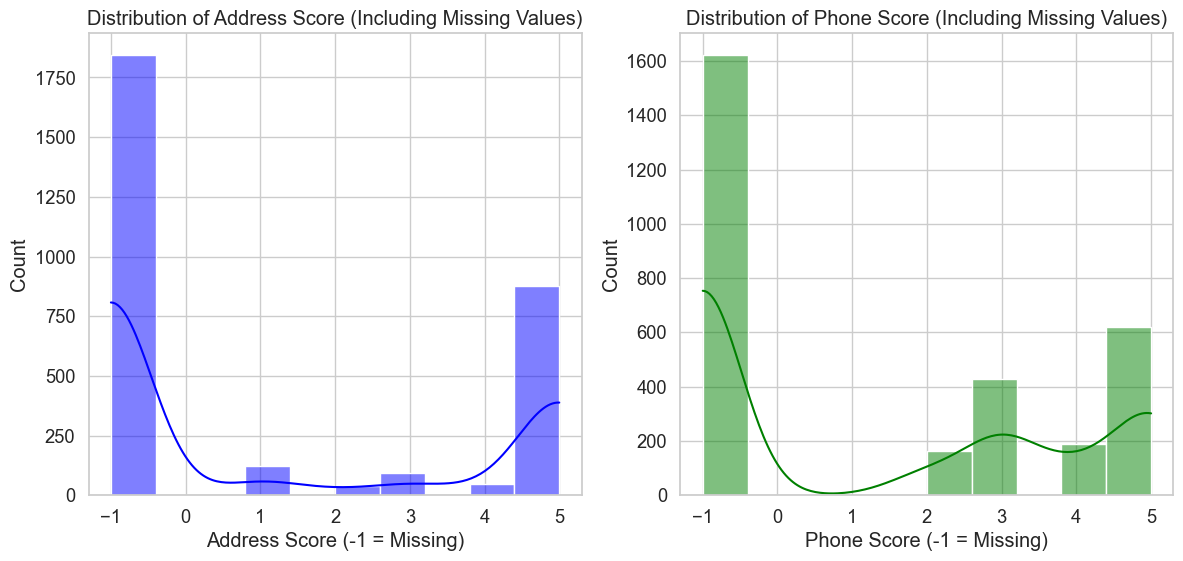

In [21]:
# Create a new column indicating missing values
assignment_df_cleaned['AddressScore_Filled'] = assignment_df_cleaned['AddressScore'].fillna(-1)
assignment_df_cleaned['PhoneScore_Filled'] = assignment_df_cleaned['PhoneScore'].fillna(-1)

# Plot distribution with missing values included
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Address Score Distribution
sns.histplot(assignment_df_cleaned['AddressScore_Filled'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Address Score (Including Missing Values)")
axes[0].set_xlabel("Address Score (-1 = Missing)")

# Phone Score Distribution
sns.histplot(assignment_df_cleaned['PhoneScore_Filled'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Phone Score (Including Missing Values)")
axes[1].set_xlabel("Phone Score (-1 = Missing)")

plt.show()

### Address and Phone Score Distribution:

1. A high percentage of missing values (-1) in both Address and Phone Scores suggests incomplete data.
2. Address and Phone Scores tend to be either high (4-5) or missing, indicating a binary-like distribution. Cleaning up lead information and verifying addresses/phone numbers might improve overall quality.

C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3500466994.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Lead_Quality', data=lead_quality_counts, palette=palette)


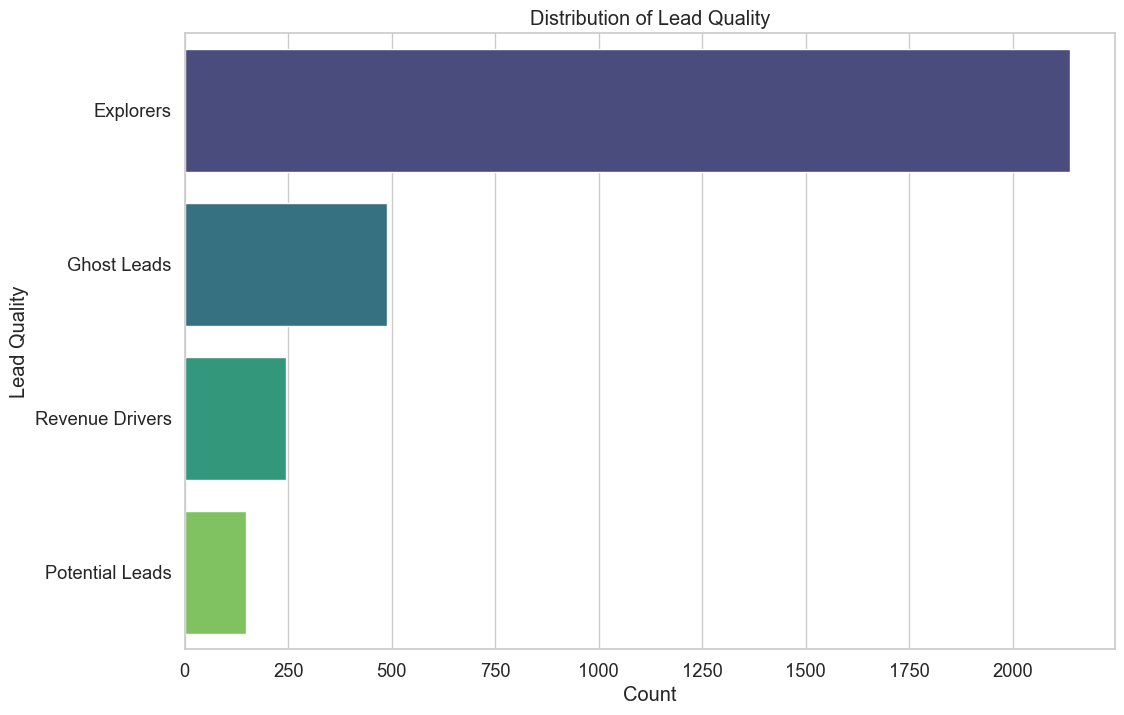

In [22]:
lead_quality_counts = assignment_df_cleaned['Lead_Quality'].value_counts().reset_index()
lead_quality_counts.columns = ['Lead_Quality', 'Count']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("viridis", n_colors=len(lead_quality_counts['Lead_Quality']))

# Creating the bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Lead_Quality', data=lead_quality_counts, palette=palette)
plt.title('Distribution of Lead Quality')
plt.xlabel('Count')
plt.ylabel('Lead Quality')
plt.show()

### Lead Quality Distribution:

1. The majority of leads fall under the "Explorers" category, which means they are not classified as good or bad leads yet.
2. "Ghost Leads" (bad quality) have a significant presence, suggesting opportunities to improve targeting.
3. "Revenue Drivers" (closed leads) are relatively low, indicating room for improvement in lead conversion.

C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3881545248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=state_counts.values, palette="viridis")


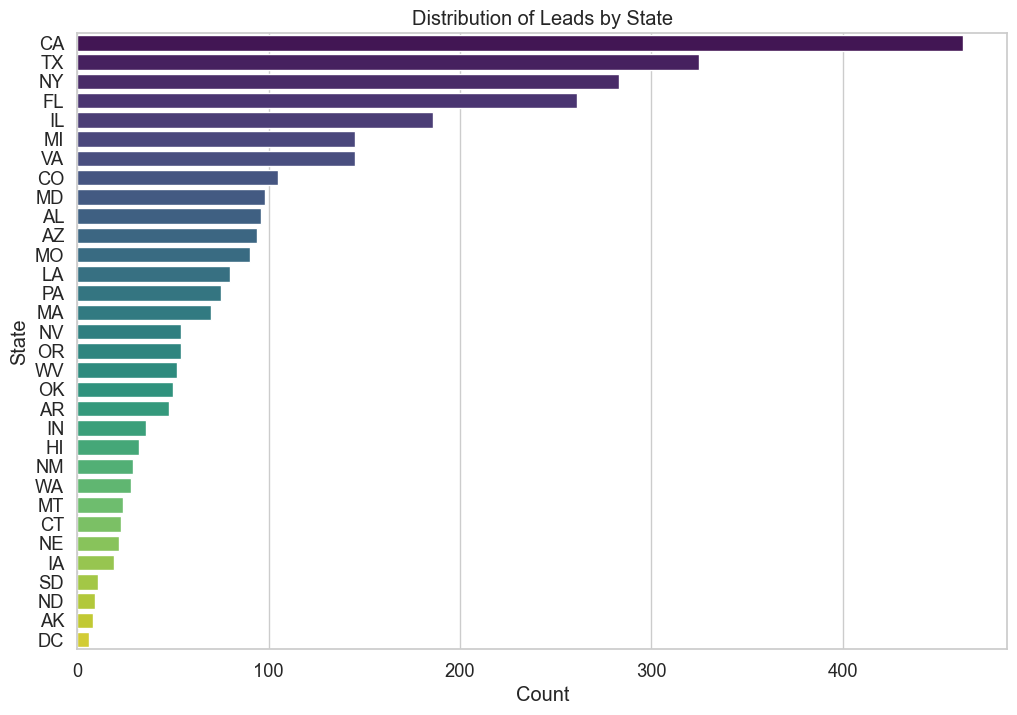

In [23]:
# State Distribution Plot
plt.figure(figsize=(12, 8))
state_counts = assignment_df_cleaned['State'].value_counts()
sns.barplot(y=state_counts.index, x=state_counts.values, palette="viridis")
plt.title('Distribution of Leads by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


### State-Wise Lead Distribution:

1. California (CA), Texas (TX), and New York (NY) contribute the highest number of leads.
2. Some states have very few leads, which might indicate untapped markets or ineffective ad targeting in those regions.

C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\2435994756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=state_counts.values, palette="viridis")


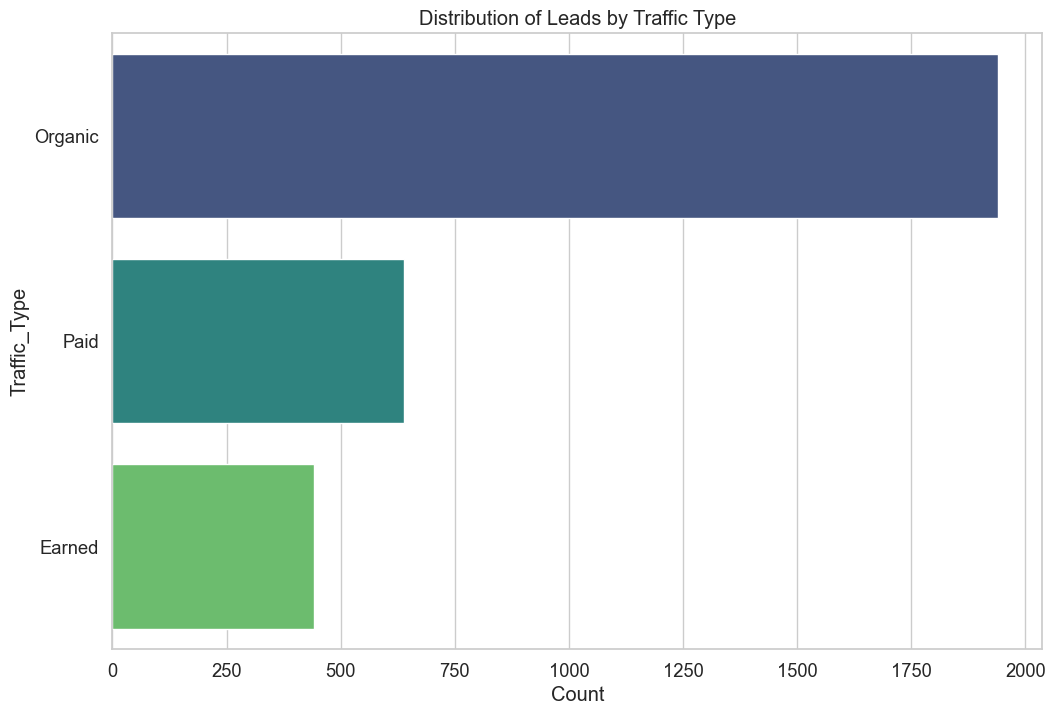

In [24]:
# State Distribution Plot
plt.figure(figsize=(12, 8))
state_counts = assignment_df_cleaned['Traffic_Type'].value_counts()
sns.barplot(y=state_counts.index, x=state_counts.values, palette="viridis")
plt.title('Distribution of Leads by Traffic Type')
plt.xlabel('Count')
plt.ylabel('Traffic_Type')
plt.show()

### Traffic Type Distribution:

1. "Organic" traffic dominates lead sources, followed by "Paid" and "Earned" referrals.
2. Paid channels could be optimized for better quality leads since they involve costs.


C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3799279012.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=assignment_df_cleaned, y=col, ax=ax, palette=palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3799279012.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=assignment_df_cleaned, y=col, ax=ax, palette=palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3799279012.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=assignment_df_cleaned, y=col, ax=ax, palette=palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3799279012.py:12: UserWarning: The palette list has more valu

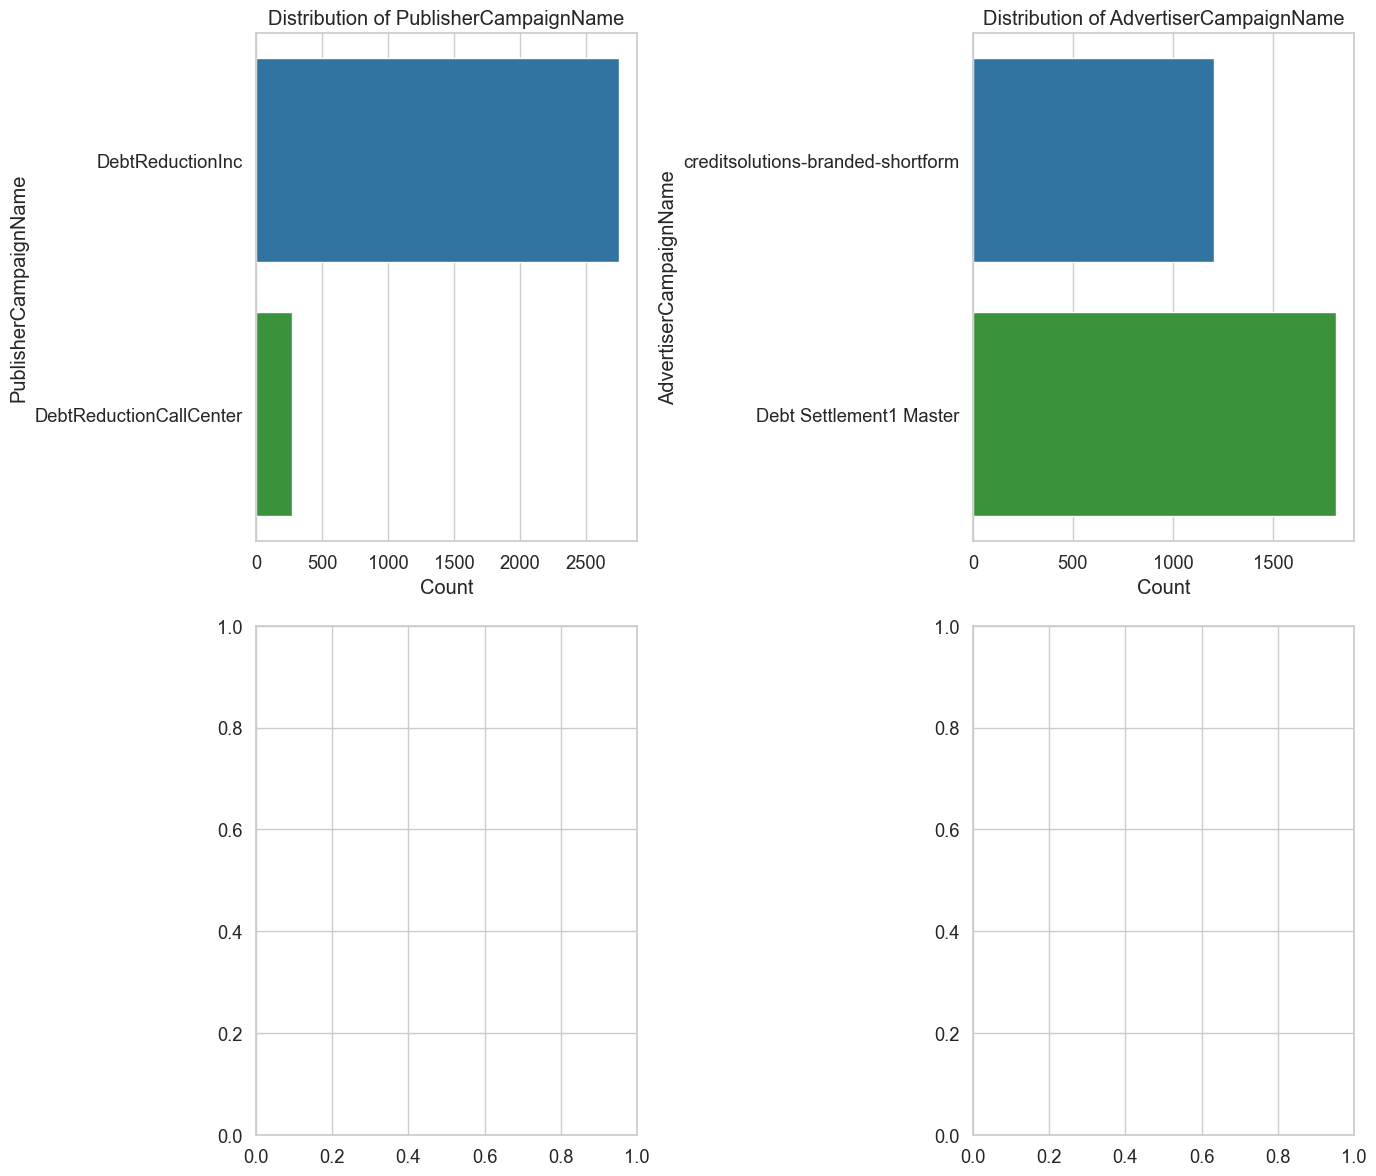

In [25]:
# Define categorical columns for visualization
categorical_columns = ['PublisherCampaignName', 'AdvertiserCampaignName']

# Define a color palette with blue and green tones
palette = ["#1f77b4", "#2ca02c", "#17becf", "#ff7f0e"]

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Iterate through the categorical columns and plot them
for ax, col in zip(axes.flatten(), categorical_columns):
    sns.countplot(data=assignment_df_cleaned, y=col, ax=ax, palette=palette)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Publisher and Advertiser Campaign Performance:

1. "DebtReductionInc" is the dominant publisher campaign, while "Debt Settlement1 Master" is the main advertiser campaign.
2. Leads from the "Call Center" (Earned) are significantly lower than form-fills, suggesting lower engagement via phone interactions.

### Partner Contributions:
1. Google and Yahoo drive the most traffic, aligning with the "Paid" segment.
2. Adknowledge and Call Center contribute to "Earned" traffic but at a much smaller scale.


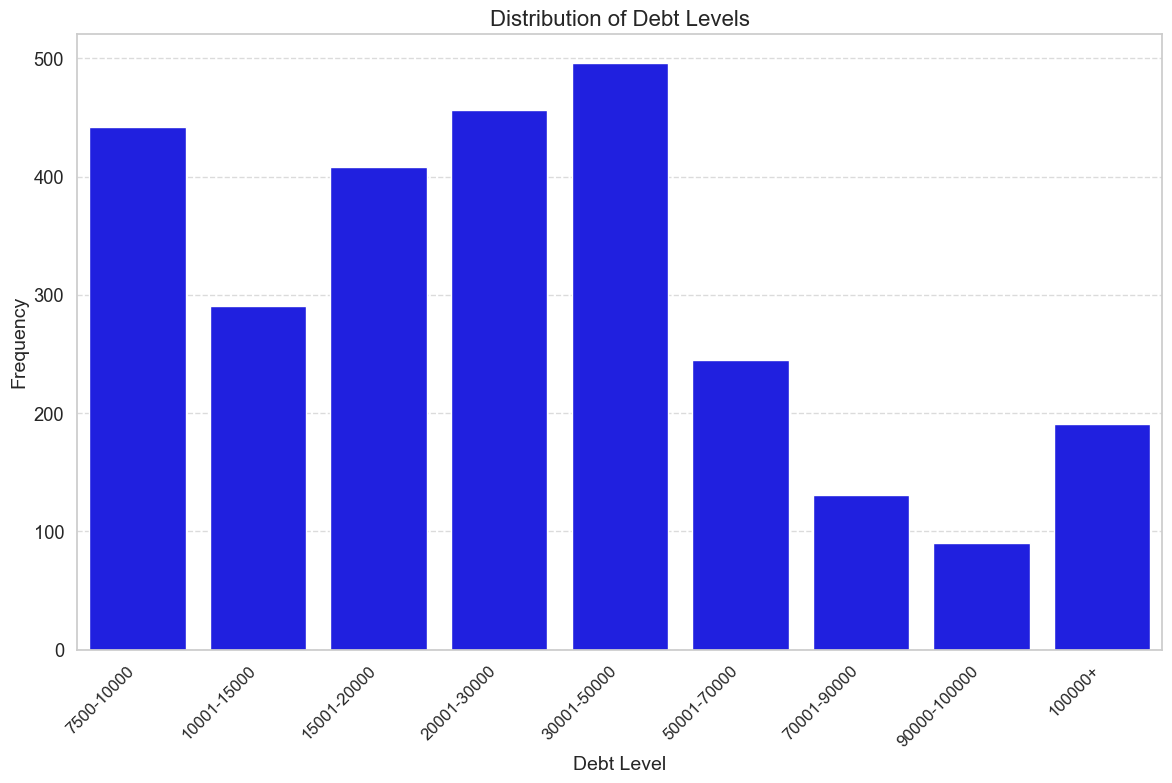

In [26]:
# Debt Level Distribution Plot
# Increase figure size for better readability
plt.figure(figsize=(14, 8))

# Sort the debt levels for better visualization
sorted_debt_levels = assignment_df_cleaned['Debt_Level_Category'].value_counts().sort_index()

# Create bar plot with improved spacing and rotated labels
sns.barplot(x=sorted_debt_levels.index, y=sorted_debt_levels.values, color="blue")

# Rotate labels to avoid congestion
plt.xticks(rotation=45, ha='right', fontsize=12)

# Improve layout spacing
plt.xlabel("Debt Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Debt Levels", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Debt Level Distribution:

1. Most leads have debt levels between $30,000-$50,000.
2. Lower debt categories ($7,500-$10,000) have a reasonable number of leads but may not be ideal for advertisers.
3. Leads with very high debt ($100,000+) are relatively low in number, possibly due to fewer people qualifying for assistance

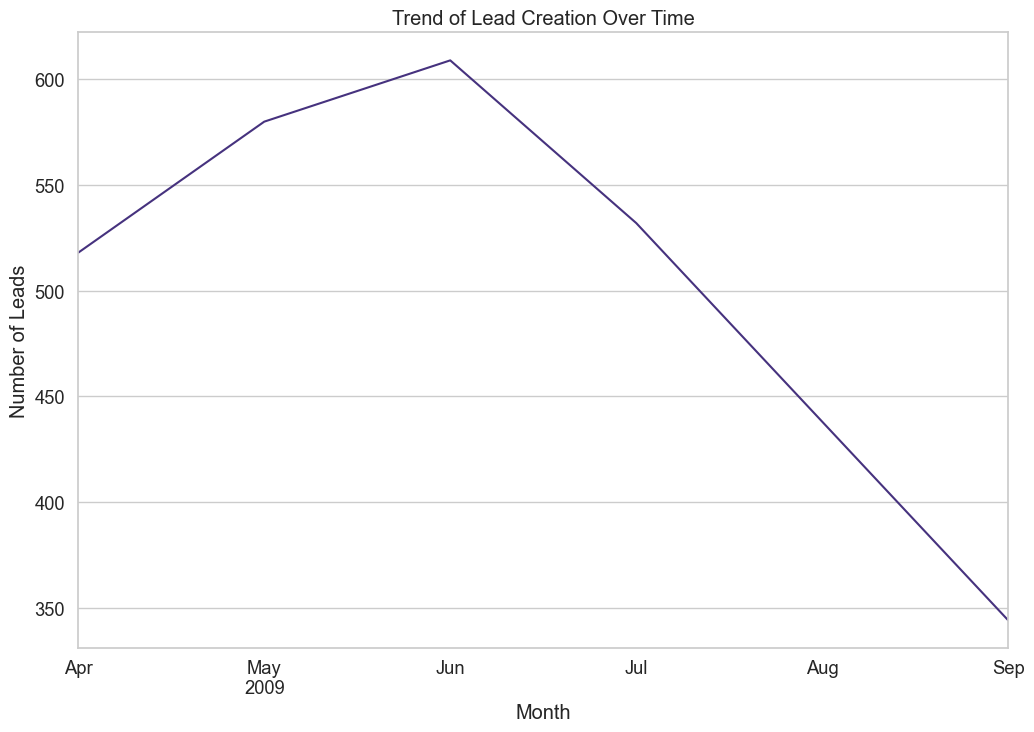

In [27]:
# Lead Creation Trends (assuming 'LeadCreated' is a datetime column)
plt.figure(figsize=(12, 8))
assignment_df_cleaned['LeadCreated'] = pd.to_datetime(assignment_df_cleaned['LeadCreated'])  # Convert if not already datetime
assignment_df_cleaned.resample('ME', on='LeadCreated').size().plot()
plt.title('Trend of Lead Creation Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.show()

### Lead Trend Over Time:

1. Lead generation peaked in June but saw a decline afterward.
2. This seasonal variation could indicate an external factor like marketing campaigns, financial seasons, or economic conditions impacting user interest.

C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\1776031277.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=assignment_df_cleaned, x='Traffic_Type', hue='Lead_Quality', palette=['blue', 'green', 'teal'])


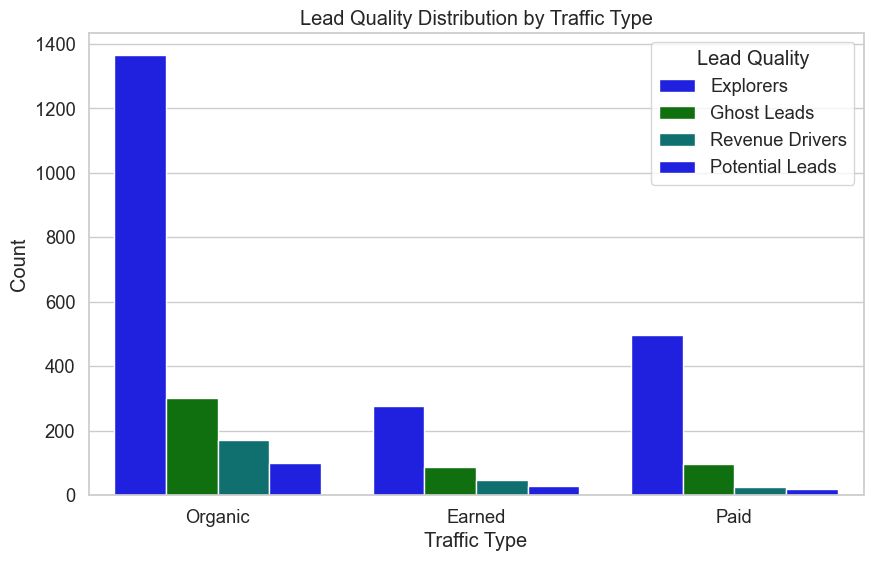

In [28]:
#Lead Quality by Traffic Type
plt.figure(figsize=(10, 6))
sns.countplot(data=assignment_df_cleaned, x='Traffic_Type', hue='Lead_Quality', palette=['blue', 'green', 'teal'])
plt.title('Lead Quality Distribution by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.legend(title="Lead Quality")
plt.show()

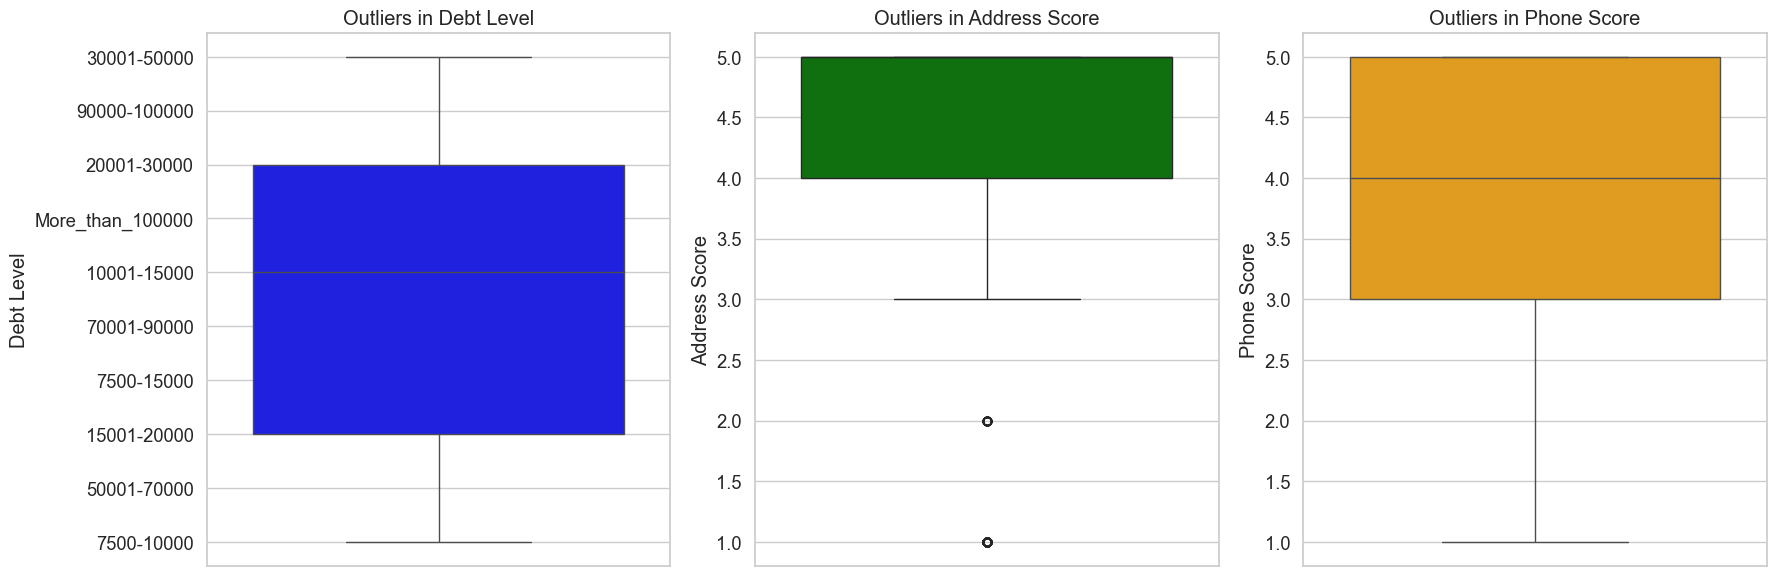

In [29]:
#Check for outliers

# Set up figure layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for Debt Level to check for outliers
sns.boxplot(y=assignment_df["DebtLevel"], ax=axes[0], color='blue')
axes[0].set_title("Outliers in Debt Level")
axes[0].set_ylabel("Debt Level")

# Boxplot for Address Score
sns.boxplot(y=assignment_df["AddressScore"], ax=axes[1], color='green')
axes[1].set_title("Outliers in Address Score")
axes[1].set_ylabel("Address Score")

# Boxplot for Phone Score
sns.boxplot(y=assignment_df["PhoneScore"], ax=axes[2], color='orange')
axes[2].set_title("Outliers in Phone Score")
axes[2].set_ylabel("Phone Score")

plt.tight_layout()
plt.show()

### 1. Are we seeing any lead quality trends over time (improving, declining)? Are they statistically significant?

<Figure size 1400x700 with 0 Axes>

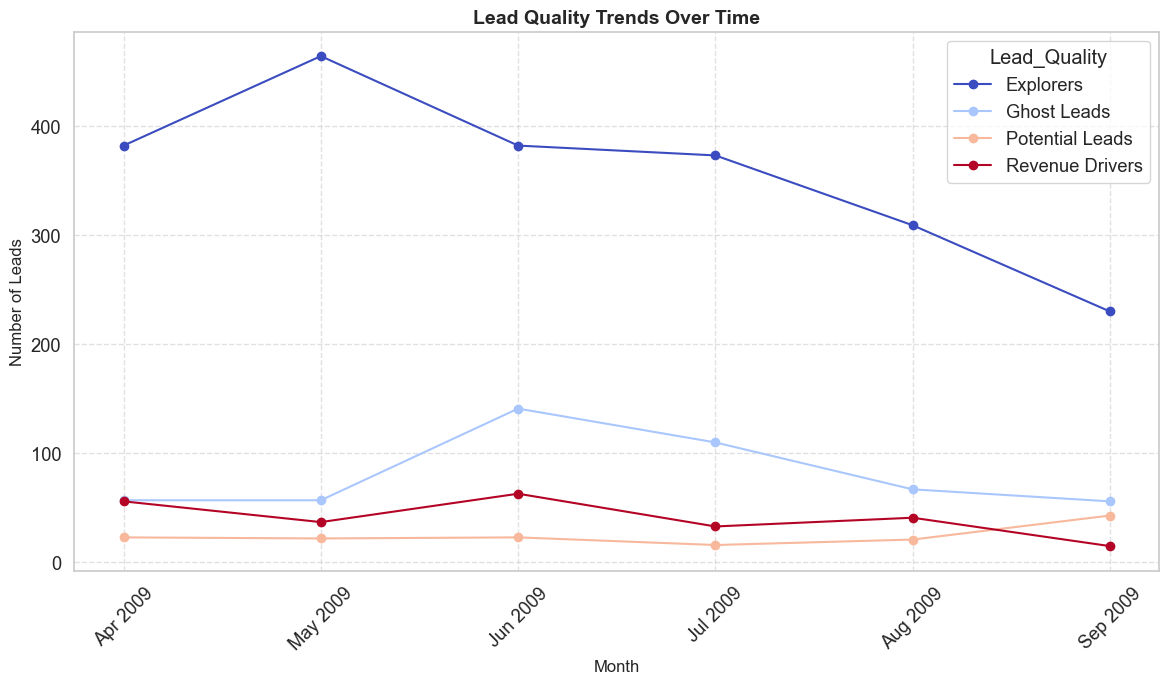

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Ensure 'LeadCreated' is in datetime format
assignment_df_cleaned['LeadCreated'] = pd.to_datetime(assignment_df_cleaned['LeadCreated'], errors='coerce')

# Extract Year-Month as a string for correct labeling
assignment_df_cleaned['LeadMonth'] = assignment_df_cleaned['LeadCreated'].dt.strftime('%b %Y')

# Group data correctly
lead_trend = assignment_df_cleaned.groupby(['LeadMonth', 'Lead_Quality']).size().unstack().fillna(0)

# Ensure the index is sorted properly for time-series plotting
lead_trend = lead_trend.sort_index(key=lambda x: pd.to_datetime(x, format='%b %Y'))

# Plot using Pandas
lead_trend.plot(kind='line', marker='o', figsize=(14, 7), colormap='coolwarm')

plt.title("Lead Quality Trends Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Leads", fontsize=12)
plt.legend(title="Lead_Quality")

# Use Pandas formatting (No Matplotlib date handling needed)
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### 1. Explorers (likely representing new or unqualified leads):
    This category shows a peak in June 2009 and a steady decline thereafter. The peak may suggest a successful campaign or market conditions favorable for lead generation at that time.

#### 2. Ghost Leads (leads that did not qualify):
    The number of ghost leads appears relatively stable across the months, indicating a consistent pattern of unqualified leads. This suggests the need for better targeting or qualification processes to reduce waste.

#### 3. Potential Leads:
    There is some variation but relatively low volume overall. The stability in numbers, despite the falling number of explorers, could indicate that these leads are more resistant to changes in marketing strategy or external factors.

#### 4. Revenue Drivers (leads that converted to customers):
    These leads show a decreasing trend from April to September 2009. The decline is concerning as it suggests decreasing efficiency or effectiveness in lead conversion processes over these months.

In [32]:
# Assuming your DataFrame is called assignment_df_cleaned and the date column is correctly formatted
assignment_df_cleaned['LeadCreated'] = pd.to_datetime(assignment_df_cleaned['LeadCreated'])

# Create a 'time' column that represents time as a numeric variable
assignment_df_cleaned['time'] = (assignment_df_cleaned['LeadCreated'] - assignment_df_cleaned['LeadCreated'].min()).dt.days

# Group by 'time' and 'Lead_Quality' and count the number of leads in each category per day
daily_quality_counts = assignment_df_cleaned.groupby(['time', 'Lead_Quality']).size().unstack(fill_value=0)

# Calculate daily totals to get proportions
daily_totals = daily_quality_counts.sum(axis=1)
daily_proportions = daily_quality_counts.div(daily_totals, axis=0)


In [33]:
# Prepare the explanatory variable (time) with a constant
X = sm.add_constant(daily_proportions.index.values)  # 'time' as index in X after grouping

results = {}
for column in daily_proportions.columns:
    y = daily_proportions[column]
    model = sm.Logit(y, X).fit(disp=0)  # Fit the logistic regression model

    # Store results
    results[column] = {
        'coef': model.params[1],  # Time coefficient
        'p-value': model.pvalues[1],  # P-value for the time coefficient
        'model_summary': model.summary()  # Model summary for detailed inspection
    }

    # Print results for quick overview
    print(f"\nTrend Analysis for {column}:")
    print(f"Coefficient (time): {model.params[1]:.4f}")
    print(f"P-value: {model.pvalues[1]:.4f}")



Trend Analysis for Explorers:
Coefficient (time): -0.0027
P-value: 0.3935

Trend Analysis for Ghost Leads:
Coefficient (time): 0.0031
P-value: 0.4222

Trend Analysis for Potential Leads:
Coefficient (time): 0.0082
P-value: 0.2119

Trend Analysis for Revenue Drivers:
Coefficient (time): -0.0038
P-value: 0.4735


C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3700102128.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'coef': model.params[1],  # Time coefficient
C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3700102128.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p-value': model.pvalues[1],  # P-value for the time coefficient
C:\Users\Admin\AppData\Local\Temp\ipykernel_22128\3700102128.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

In [31]:
# Are they statistically significant?

# Hypothesis:
# Null Hypothesis (H₀): Lead quality distribution is independent of time (i.e., the proportion of each lead category does not change significantly over different months).
# Alternative Hypothesis (H₁): Lead quality distribution depends on time (i.e., certain months have significantly higher/lower proportions of each lead category).

# Create a contingency table of Lead Quality by Month
contingency_table = pd.crosstab(assignment_df_cleaned['LeadMonth'], assignment_df_cleaned['Lead_Quality'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Store Chi-Square test results
chi_square_results = {
    "Chi-Square Statistic": chi2,
    "P-Value": p,
    "Degrees of Freedom": dof
}

# Hypothesis:
# Null Hypothesis (H₀): The average lead quality score does not significantly differ across different months.
# Alternative Hypothesis (H₁): The average lead quality score does significantly differ across different months.

# Assign numeric scores to lead quality categories for ANOVA test
lead_quality_scores = {
    "Revenue Drivers": 3,
    "Potential Leads": 2,
    "Explorers": 1,
    "Ghost Leads": 0
}

assignment_df_cleaned['Lead_Quality_Score'] = assignment_df_cleaned['Lead_Quality'].map(lead_quality_scores)

# Perform ANOVA (Check if Lead Quality Scores Differ Significantly Over Time)
anova_p = stats.f_oneway(
    *[assignment_df_cleaned.loc[assignment_df_cleaned['LeadMonth'] == month, 'Lead_Quality_Score'] 
      for month in assignment_df_cleaned['LeadMonth'].unique()]
).pvalue

# Store ANOVA test results
anova_results = {
    "ANOVA P-Value": anova_p
}

# Determine significance
chi_square_results["Significance"] = "Significant" if p < 0.05 else "Not Significant"
anova_results["Significance"] = "Significant" if anova_p < 0.05 else "Not Significant"

# Display results
chi_square_results, anova_results

({'Chi-Square Statistic': np.float64(129.688639268431),
  'P-Value': np.float64(2.446691495892032e-20),
  'Degrees of Freedom': 15,
  'Significance': 'Significant'},
 {'ANOVA P-Value': np.float64(0.0003159896757783457),
  'Significance': 'Significant'})

1.  Chi-Square Test Results
Chi-Square Statistic: 129.689
P-Value: 2.44e-20 (extremely small)
Degrees of Freedom: 15
Significance: Significant 
Degrees of Freedom: 15
Significance: Significant
The very low p-value from the Chi-Square test indicates that there is a statistically significant association between time (grouped into intervals) and the categories of lead quality. This result implies that changes in lead quality categories over time are not random but rather exhibit a discernible pattern.

2. ANOVA Test Results
ANOVA P-Value: 0.000316
Significance: Significant
Similarly, the ANOVA test provides a p-value well below the common alpha level of 0.05, suggesting significant differences in the means of the dependent variable (presumably the number of leads or a similar metric) across different time periods. This result supports the notion that there are significant variations over time, which could be related to various factors such as seasonal trends, effectiveness of marketing campaigns, or external economic conditions

1. Chi-Square Test Results:

    - Chi-Square Statistic: 129.69 (very high)
    - P-Value: 2.44e-20 (extremely small)
    - Degrees of Freedom: 15
    - Significance: Significant
    - Interpretation: Since p-value < 0.05, we reject the null hypothesis (H₀).This means lead quality distribution is significantly dependent on time. There is a non-random trend in how lead quality varies across months.

2. ANOVA Test Results:

    - P-Value: 0.0003 (significant)
    - Significance: Significant
    - Interpretation:Since p-value < 0.05, we reject the null hypothesis (H₀).This means the average lead quality score is significantly different across months.Certain months had higher or lower average lead quality scores.
    
    
* Key Takeaways
    - Lead quality is NOT stable over time—both tests confirm statistically significant variations.
    - The distribution of lead quality categories (Chi-Square) and average lead quality scores (ANOVA) change significantly over - months. This suggests external factors (e.g., seasonality, campaign differences, traffic sources) could be influencing lead quality trends.



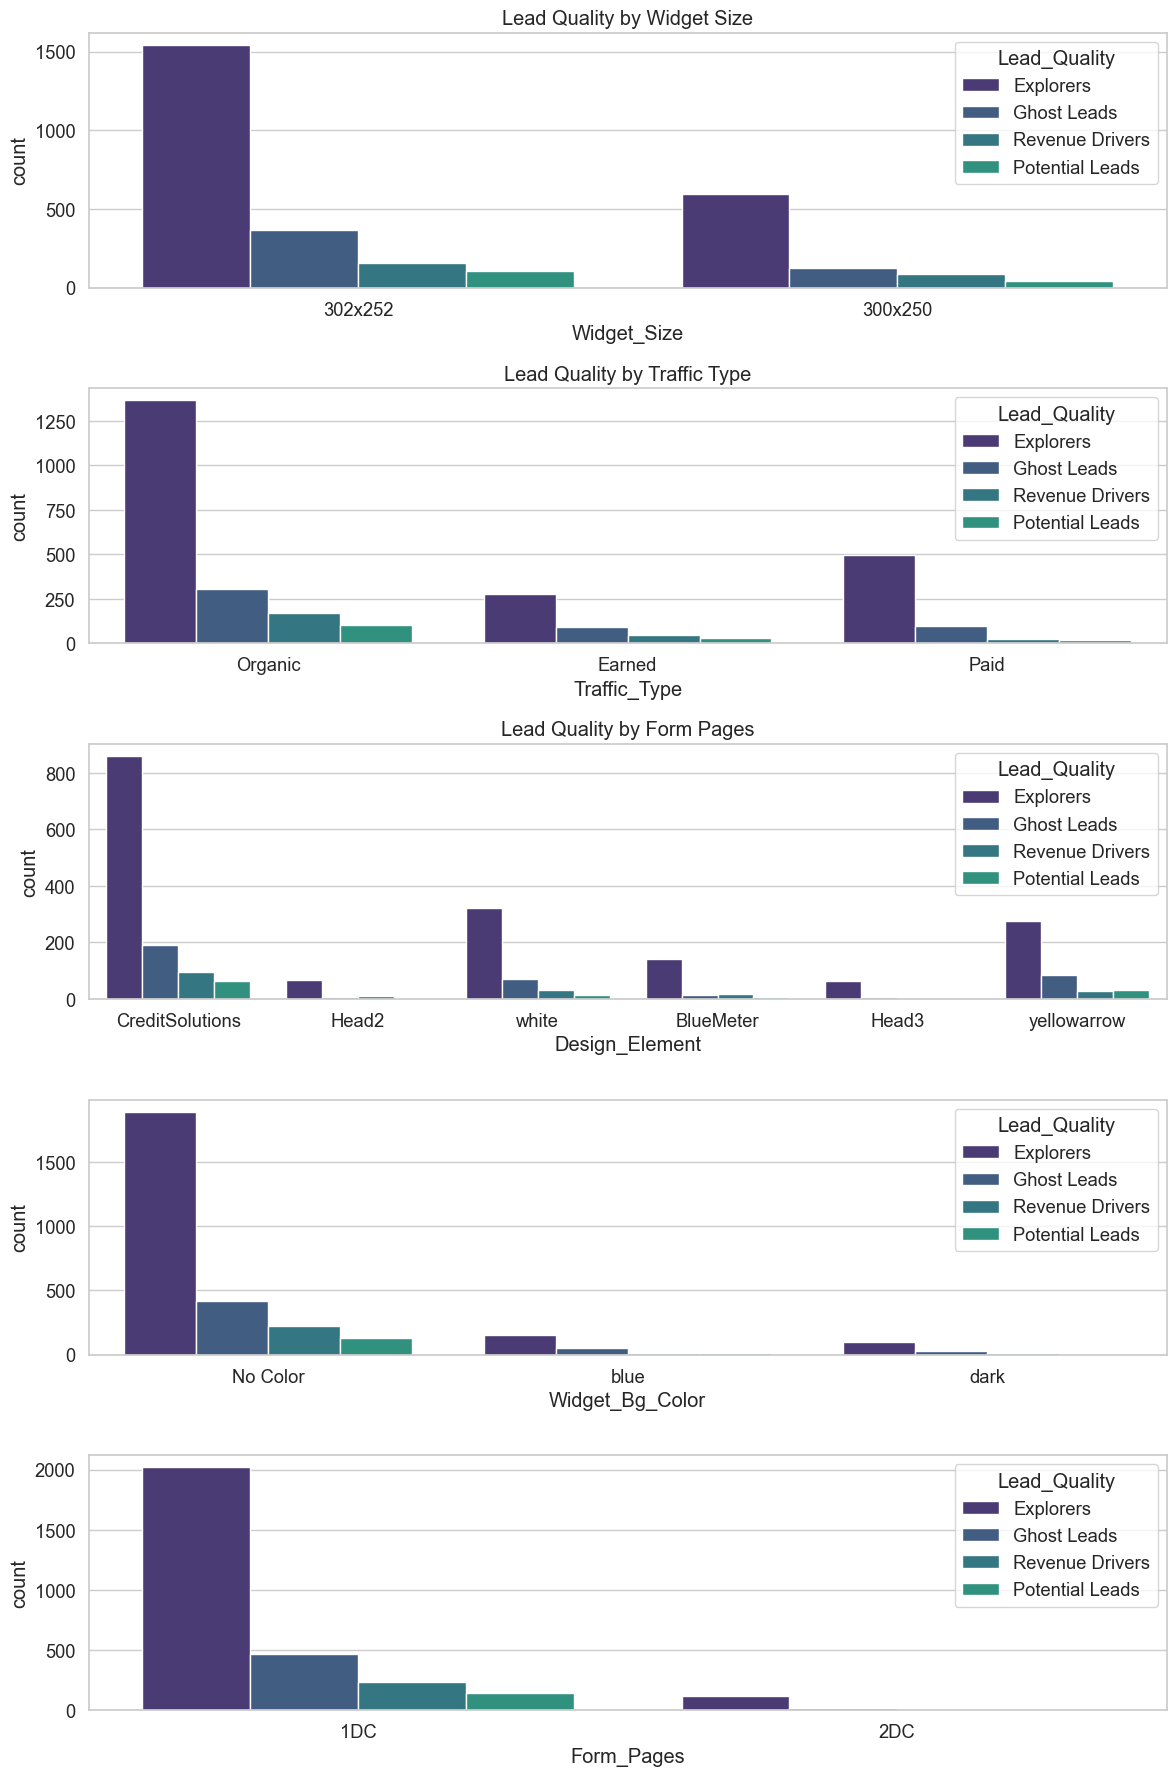

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions and count plots for categorical data
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))
sns.countplot(data=assignment_df_cleaned, x='Widget_Size', hue='Lead_Quality', ax=axes[0])
axes[0].set_title('Lead Quality by Widget Size')

sns.countplot(data=assignment_df_cleaned, x='Traffic_Type', hue='Lead_Quality', ax=axes[1])
axes[1].set_title('Lead Quality by Traffic Type')

sns.countplot(data=assignment_df_cleaned, x='Design_Element', hue='Lead_Quality', ax=axes[2])
axes[2].set_title('Lead Quality by Design Element')

sns.countplot(data=assignment_df_cleaned, x='Widget_Bg_Color', hue='Lead_Quality', ax=axes[3])
axes[2].set_title('Lead Quality by Widget Background Color')

sns.countplot(data=assignment_df_cleaned, x='Form_Pages', hue='Lead_Quality', ax=axes[4])
axes[2].set_title('Lead Quality by Form Pages')

plt.tight_layout()
plt.show()

# Checking for numeric correlations with heatmaps if there are relevant numeric variables
# sns.heatmap(assignment_df_cleaned[['NumericVariable1', 'NumericVariable2', 'Lead_Quality']].corr(), annot=True)


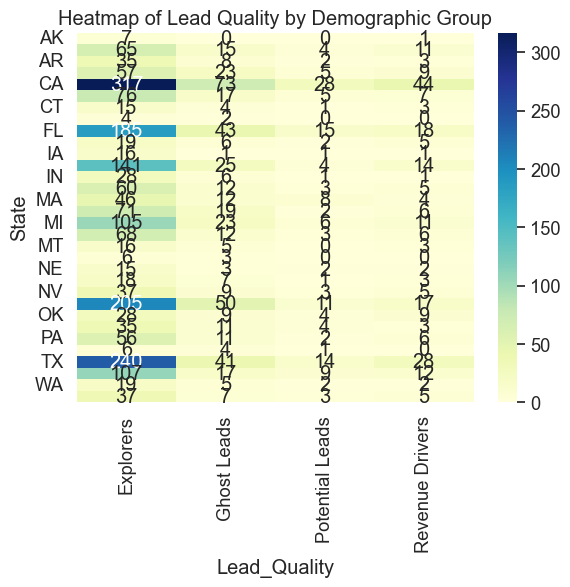

In [41]:
# Assuming there are categorical representations of demographics or ad content
pivot_table = pd.pivot_table(data=assignment_df_cleaned, values='VendorLeadID',  # assuming a unique lead identifier
                             index='State',  # Replace with actual demographic data column
                             columns='Lead_Quality', 
                             aggfunc='count', fill_value=0)

sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Lead Quality by Demographic Group')
plt.show()
